# Problem Statement:

This assignment challenges students to construct and train a neural network to accurately classify handwritten digits from the MNIST dataset. The goal is to navigate through the preprocessing of image data, select an appropriate neural
network architecture, and apply optimization techniques to achieve high classification accuracy.

# Introduction:

The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image. The goal is to build a neural network model that can accurately classify these images into one of the ten digit classes (0 through 9).

# Objectives:

### Data Preprocessing: 
Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.

### Model Development: 
Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.

### Training: 
Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.

### Evaluation: 
Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.

### Prediction: 
Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.

### Analysis: 
Analyze the results, understand the model's performance, and explore ways to improve it if necessary.


# Challenges and Considerations:

### Class Imbalance: 
Ensure that the dataset does not have a significant class imbalance that could negatively affect the model’s performance. If imbalance is present, strategies to mitigate its effects should be considered.

### Model Complexity: 
Choose an appropriate model complexity that is capable of learning from the data without overfitting. This may involve experimenting with different numbers of layers and units, as well as regularization techniques.

### Activation Functions: 
Use appropriate activation functions in the hidden layers (ReLU is commonly used for image data) and softmax activation in the output layer to convert logits to probabilities.

### Evaluation Metrics: 
Focus on accuracy as the primary evaluation metric, but also be open to exploring other metrics that could provide additional insights into the model’s performance.

### Hyperparameter Tuning: 
Experiment with different hyperparameters such as learning rate, batch size, and number of epochs to optimize the model’s
performance.

### Predictions and Interpretability: 
Provide clear and interpretable predictions, ensuring that the output probabilities are well-calibrated and meaningful.

# 1. Load Important Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

C:\Users\raman\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# 2. Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Train images:", x_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


# 3. Preprocessing

In [4]:
# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 4. One‑hot encode labels for 10 classes (0–9)

In [5]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("Example label before one-hot:", y_train[0])
print("Example label after one-hot:", y_train_cat[0])

Example label before one-hot: 5
Example label after one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 5. Check class distribution (class imbalance)

In [6]:
class_counts = np.bincount(y_train)

print("Class Distribution:")
for i, count in enumerate(class_counts):
    print(f"Digit {i}: {count} samples")

Class Distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


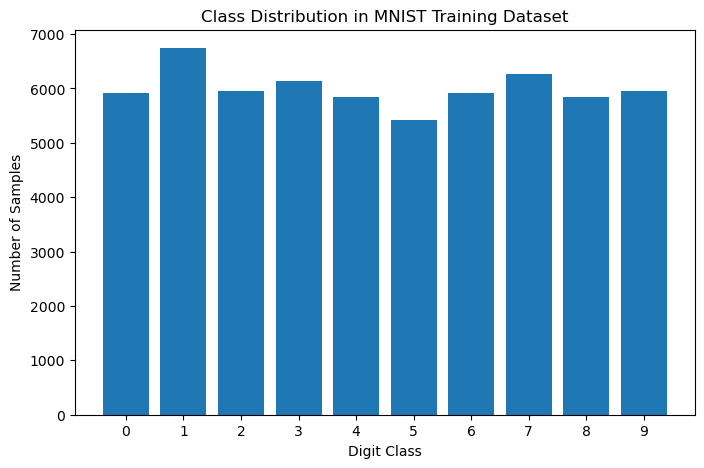

In [7]:
plt.figure(figsize=(8,5))
plt.bar(range(10), class_counts)
plt.xlabel("Digit Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in MNIST Training Dataset")
plt.xticks(range(10))
plt.show()

# 6. Model Development

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 7. Model Compilation

In [9]:
learning_rate = 0.01

sgd = SGD(learning_rate=learning_rate, momentum=0.0)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# 8. Training

In [10]:
history = model.fit(x_train, y_train_cat, batch_size=128, epochs=20, validation_split=0.1, verbose=2)

Epoch 1/20
422/422 - 3s - 7ms/step - accuracy: 0.6480 - loss: 1.3453 - val_accuracy: 0.8672 - val_loss: 0.6144
Epoch 2/20
422/422 - 2s - 5ms/step - accuracy: 0.8606 - loss: 0.5374 - val_accuracy: 0.9058 - val_loss: 0.3812
Epoch 3/20
422/422 - 2s - 5ms/step - accuracy: 0.8870 - loss: 0.4103 - val_accuracy: 0.9158 - val_loss: 0.3165
Epoch 4/20
422/422 - 2s - 5ms/step - accuracy: 0.8989 - loss: 0.3593 - val_accuracy: 0.9237 - val_loss: 0.2850
Epoch 5/20
422/422 - 2s - 6ms/step - accuracy: 0.9073 - loss: 0.3290 - val_accuracy: 0.9278 - val_loss: 0.2641
Epoch 6/20
422/422 - 3s - 7ms/step - accuracy: 0.9134 - loss: 0.3073 - val_accuracy: 0.9320 - val_loss: 0.2484
Epoch 7/20
422/422 - 2s - 5ms/step - accuracy: 0.9175 - loss: 0.2903 - val_accuracy: 0.9337 - val_loss: 0.2370
Epoch 8/20
422/422 - 2s - 5ms/step - accuracy: 0.9216 - loss: 0.2761 - val_accuracy: 0.9373 - val_loss: 0.2247
Epoch 9/20
422/422 - 3s - 6ms/step - accuracy: 0.9249 - loss: 0.2637 - val_accuracy: 0.9383 - val_loss: 0.2180
E

# 9. Plot Training & Validation Curves

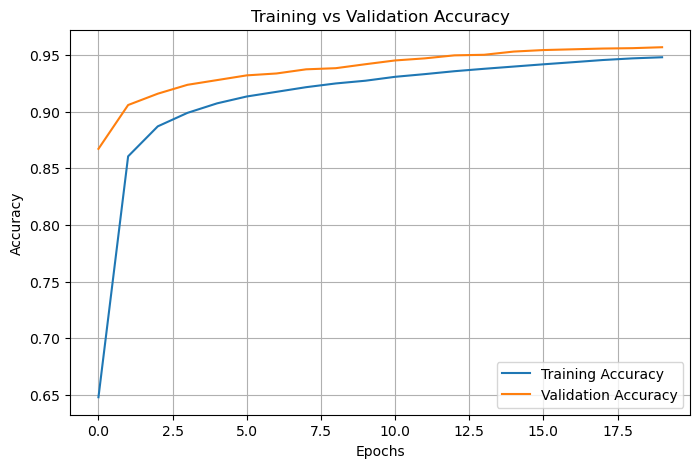

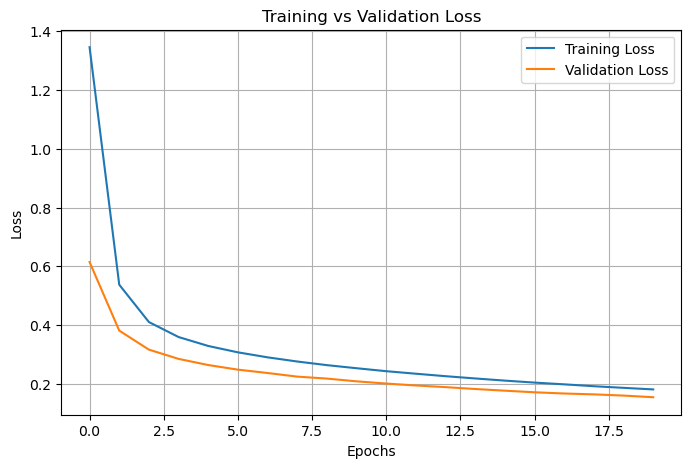

In [11]:
# Plot Training & Validation Accuracy

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()





# Plot Training & Validation Loss

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluation

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.1805
Test accuracy: 0.9487


# 11. Prediction

In [13]:
sample = x_test[0].reshape(1, 784)
prediction = model.predict(sample)
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Digit: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
True label: 2
Predicted label: 2


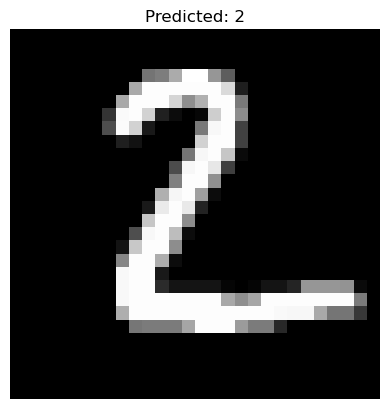

In [14]:
idx = 1

single_image_flat = x_test[idx]

single_image_input = np.expand_dims(single_image_flat, axis=0)

probs = model.predict(single_image_input)
pred_class = np.argmax(probs, axis=1)[0]

print("True label:", y_test[idx])
print("Predicted label:", pred_class)

single_image_2d = single_image_flat.reshape(28, 28)
plt.imshow(single_image_2d, cmap="gray")
plt.title(f"Predicted: {pred_class}")
plt.axis("off")
plt.show()

In [15]:
# Predict for a first 10 images
batch_images = x_test[:10]
batch_probs = model.predict(batch_images)
batch_preds = np.argmax(batch_probs, axis=1)

print("True labels:     ", y_test[:10])
print("Predicted labels:", batch_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
True labels:      [7 2 1 0 4 1 4 9 5 9]
Predicted labels: [7 2 1 0 4 1 4 9 6 9]


In [16]:
# 13. Confusion matrix and classification report

test_probs = model.predict(x_test)
test_preds = np.argmax(test_probs, axis=1)

cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_test, test_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[ 963    0    0    1    0    3    5    4    3    1]
 [   0 1114    2    2    0    2    5    2    8    0]
 [   9    3  963    9   10    1    7   11   14    5]
 [   1    2    9  947    1   15    1   13   15    6]
 [   1    1    2    1  941    0   12    3    3   18]
 [   9    1    0   13    6  831   13    2    9    8]
 [  10    3    2    1   11    9  919    0    3    0]
 [   2    8   16    3    4    1    0  977    2   15]
 [   4    1    3   15    9   11   11    9  902    9]
 [   7    6    1   14   28    4    1   12    6  930]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.93      0.96      0.94       982
           5       0.95      0.93      0.94       892
      

# Hyperparameter Tuning

Lest try test and compare different learning_rates , batch_size and epochs to fetch the best combination for the model

In [17]:
def build_model(learning_rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    optimizer = SGD(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [18]:
learning_rates = [0.05, 0.01, 0.001]
batch_sizes = [128, 64, 32]
epochs_list = [20, 10]

In [19]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)


results = []

for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epochs_list:
            
            print(f"Training with LR={lr}, Batch={batch}, Epochs={epochs}")
            
            model = build_model(lr)
            
            model.fit(
                x_train,
                y_train_oh,
                epochs=epochs,
                batch_size=batch,
                verbose=0
            )
            
            _, test_acc = model.evaluate(
                x_test,
                y_test_oh,
                verbose=0
            )
            
            results.append({
                "learning_rate": lr,
                "batch_size": batch,
                "epochs": epochs,
                "test_accuracy": test_acc
            })

Training with LR=0.05, Batch=128, Epochs=20
Training with LR=0.05, Batch=128, Epochs=10
Training with LR=0.05, Batch=64, Epochs=20
Training with LR=0.05, Batch=64, Epochs=10
Training with LR=0.05, Batch=32, Epochs=20
Training with LR=0.05, Batch=32, Epochs=10
Training with LR=0.01, Batch=128, Epochs=20
Training with LR=0.01, Batch=128, Epochs=10
Training with LR=0.01, Batch=64, Epochs=20
Training with LR=0.01, Batch=64, Epochs=10
Training with LR=0.01, Batch=32, Epochs=20
Training with LR=0.01, Batch=32, Epochs=10
Training with LR=0.001, Batch=128, Epochs=20
Training with LR=0.001, Batch=128, Epochs=10
Training with LR=0.001, Batch=64, Epochs=20
Training with LR=0.001, Batch=64, Epochs=10
Training with LR=0.001, Batch=32, Epochs=20
Training with LR=0.001, Batch=32, Epochs=10


In [22]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by="test_accuracy", ascending=False)

,learning_rate,batch_size,epochs,test_accuracy
5,0.050,32,10,0.9800
4,0.050,32,20,0.9790
2,0.050,64,20,0.9786
0,0.050,128,20,0.9759
10,0.010,32,20,0.9719
3,0.050,64,10,0.9713
1,0.050,128,10,0.9669
8,0.010,64,20,0.9653
11,0.010,32,10,0.9637
9,0.010,64,10,0.9500


In the hyperparameter experiments, the setup with a learning rate of 0.05, batch size 32, and 10 epochs gave the best test accuracy at about 98%. For the final model, however, a configuration with a learning rate of 0.05, batch size 64, and 20 epochs was chosen. This option offers very similar accuracy while being a bit more stable during training, which helps it generalize better and makes it less sensitive to random training noise.